In [37]:
import pandas as pd
import numpy as np
import yaml as yl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [38]:
# PD Options
pd.options.display.max_columns = 57
pd.options.display.max_rows = 50
pd.options.display.max_colwidth = 100

# MPL Options
plt.rcParams['figure.figsize'] = (20, 10) 
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.framealpha'] = 0.8


# Params
params = yl.safe_load(open('C:\\repos\\deprivationMapping\\params.yaml'))
allScoresPath = params['ImdPaths']['AllScoresRaw']
samhiScoresPath = params['ImdPaths']['SamhiScoresRaw']


In [39]:
imd_df = pd.read_csv(allScoresPath)
imd_df.sample(5)

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),Employment Rank (where 1 is most deprived),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Score","Education, Skills and Training Rank (where 1 is most deprived)","Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)",Health Deprivation and Disability Score,Health Deprivation and Disability Rank (where 1 is most deprived),Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs),Crime Score,Crime Rank (where 1 is most deprived),Crime Decile (where 1 is most deprived 10% of LSOAs),Barriers to Housing and Services Score,Barriers to Housing and Services Rank (where 1 is most deprived),Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs),Living Environment Score,Living Environment Rank (where 1 is most deprived),Living Environment Decile (where 1 is most deprived 10% of LSOAs),Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Children Index (IDACI) Rank (where 1 is most deprived),Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Rank (where 1 is most deprived),Income Deprivation Affecting Older People (IDAOPI) Decile (where 1 is most deprived 10% of LSOAs),Children and Young People Sub-domain Score,Children and Young People Sub-domain Rank (where 1 is most deprived),Children and Young People Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Adult Skills Sub-domain Score,Adult Skills Sub-domain Rank (where 1 is most deprived),Adult Skills Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Geographical Barriers Sub-domain Score,Geographical Barriers Sub-domain Rank (where 1 is most deprived),Geographical Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Wider Barriers Sub-domain Score,Wider Barriers Sub-domain Rank (where 1 is most deprived),Wider Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Indoors Sub-domain Score,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
1986,E01002036,Haringey 002A,E09000014,Haringey,55.030,1464,1,0.310,1945,1,0.260,1077,1,35.368,6651,3,0.843,5514,2,1.261,1923,1,41.950,1672,1,36.289,5689,2,0.310,3975,2,0.391,2058,1,0.165,13448,5,0.468,3254,1,-1.118,30600,10,5.629,500,1,0.419,10254,4,1.306,2410,1,1743,453,1082,208,1077
8072,E01008286,Gateshead 014C,E08000037,Gateshead,28.908,8540,3,0.170,8743,3,0.169,5068,2,23.385,11683,4,0.800,5902,2,-0.243,20235,7,28.445,8078,3,10.431,23606,8,0.181,11492,4,0.188,10859,4,0.180,13200,5,0.356,10203,4,0.651,6310,2,0.356,13419,5,-1.377,31099,10,0.436,9078,3,1474,224,754,496,761
3882,E01003974,Southwark 015E,E09000028,Southwark,35.370,5766,2,0.248,4157,2,0.132,8244,3,22.664,12128,4,0.095,14593,5,0.943,3999,2,34.386,4376,2,40.134,4221,2,0.315,3813,2,0.311,4268,2,-0.104,17804,6,0.383,8032,3,-0.887,28836,9,4.635,1473,1,0.307,11786,4,1.752,886,1,13

In [40]:
samhi_df = pd.read_csv(samhiScoresPath)
samhi_df[samhi_df['year']==2019].sample(5)

,lsoa11,year,prop_ibesa,est_qof_dep,antidep_rate,z_mh_rate,samhi_index,samhi_dec
269055,E01006464,2019,5.521472,16.340454,60.960525,1.872491,2.773684,10
289348,E01027301,2019,0.978474,13.972241,38.943990,-0.380513,0.899213,6
289913,E01027876,2019,0.572519,10.455746,41.770540,-0.363821,0.686341,5
294442,E01032501,2019,0.924499,9.286813,38.299884,-0.457834,0.371645,4
287378,E01025291,2019,3.540904,16.706780,51.095025,0.508078,2.041343,9


In [41]:
working_df = pd.merge(imd_df, samhi_df[samhi_df['year']==2019], left_on=['LSOA code (2011)'] , right_on=['lsoa11'])
working_df.sample(5)

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Score (rate),Employment Rank (where 1 is most deprived),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Score","Education, Skills and Training Rank (where 1 is most deprived)","Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)",Health Deprivation and Disability Score,Health Deprivation and Disability Rank (where 1 is most deprived),Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs),Crime Score,Crime Rank (where 1 is most deprived),Crime Decile (where 1 is most deprived 10% of LSOAs),Barriers to Housing and Services Score,Barriers to Housing and Services Rank (where 1 is most deprived),Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs),Living Environment Score,Living Environment Rank (where 1 is most deprived),Living Environment Decile (where 1 is most deprived 10% of LSOAs),...,Adult Skills Sub-domain Score,Adult Skills Sub-domain Rank (where 1 is most deprived),Adult Skills Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Geographical Barriers Sub-domain Score,Geographical Barriers Sub-domain Rank (where 1 is most deprived),Geographical Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Wider Barriers Sub-domain Score,Wider Barriers Sub-domain Rank (where 1 is most deprived),Wider Barriers Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Indoors Sub-domain Score,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),lsoa11,year,prop_ibesa,est_qof_dep,antidep_rate,z_mh_rate,samhi_index,samhi_dec
28022,E01028754,Vale of White Horse 010E,E07000180,Vale of White Horse,8.050,27015,9,0.047,26945,9,0.035,29342,9,2.940,29802,10,-1.210,30351,10,-1.023,29290,9,35.056,4068,2,17.957,16843,6,...,0.166,29800,10,1.495,1449,1,-2.421,27531,9,0.105,14822,5,0.031,14794,5,1390,234,767,389,776,E01028754,2019,0.000000,13.249578,38.804268,-0.406335,0.784402,5
29833,E01030616,Reigate and Banstead 010B,E07000211,Reigate and Banstead,4.231,31278,10,0.035,29752,10,0.028,31013,10,1.806,31095,10,-1.382,31271,10,-0.318,21296,7,19.789,16896,6,11.596,22386,7,...,0.142,31004,10,0.313,10584,4,-0.441,17558,6,-0.833,27630,9,0.371,9881,4,1678,317,829,532,842,E01030616,2019,1.247401,10.547918,31.808278,-0.431855,0.149771,3
20445,E01021018,Hastings 010F,E07000062,Hastings,16.316,17638,6,0.084,18898,6,0.075,17627,6,15.227,17178,6,0.222,12753,4,0.146,14381,5,31.049,6244,2,6.131,28189,9,...,0.306,15301,5,0.724,5603,2,0.694,11907,4,-0.829,27599,9,-0.318,20649,7,1900,319,1118,463,1112,E01021018,2019,1.649306,14.044089,51.626200,0.397765,1.727513,9
11664,E01012022,Middlesbrough 015A,E06000002,Middlesbrough,14.801,19123,6,0.086,18568,6,0.073,18023,6,10.513,21353,7,0.522,8849,3,0.037,16108,5,19.335,17476,6,10.974,23032,8,...,0.288,17357,6,0.667,6180,2,-3.560,30750,10,-0.551,24530,8,0.098,13703,5,1428,219,865,344,888,E01012022,2019,1.375405,9.523656,55.698692,0.076752,1.446860,8
10949,E01011266,Leeds 008A,E08000035,Leeds,5.808,29666,10,0.021,32142,10,0.026,31521,10,1.014

In [42]:
assert len(working_df) == len(imd_df)

In [43]:
# Some basic regressions
deprivationArray = np.array( working_df['Index of Multiple Deprivation (IMD) Score'])
samhiArray = np.array( working_df['samhi_index'])
lin_fit = LinearRegression(fit_intercept=True).fit(deprivationArray.reshape(-1,1), samhiArray.reshape(-1,1))
lin_fit.coef_


array([[0.02170296]])

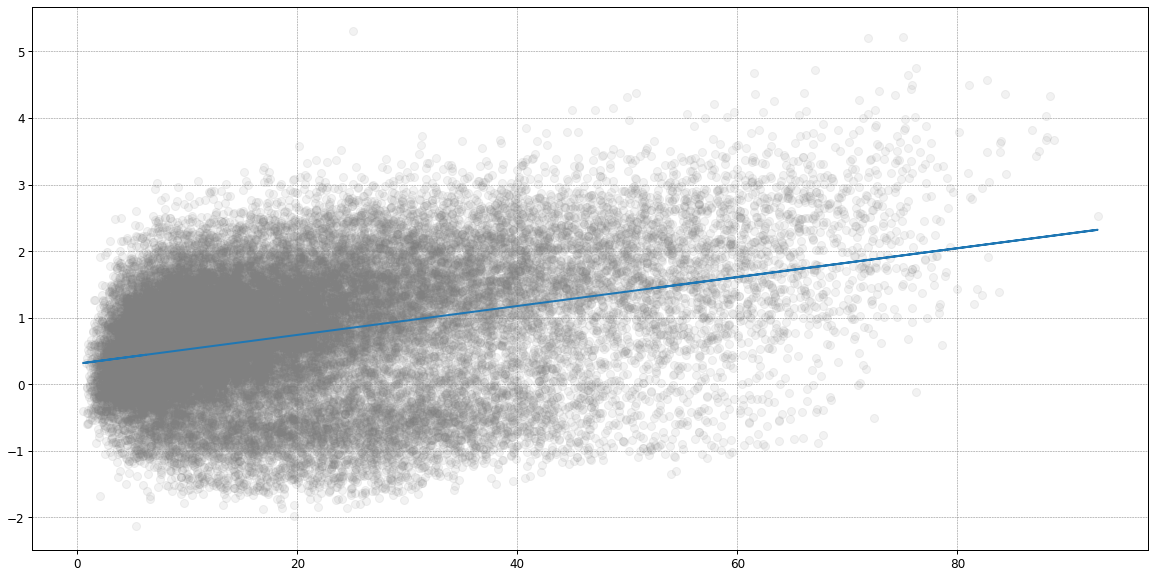

In [44]:
import matplotlib.pyplot as plt
plt.scatter(deprivationArray, samhiArray, alpha=0.1, color='grey')
plt.plot(deprivationArray, lin_fit.predict(deprivationArray.reshape(-1,1)))
plt.show()


In [45]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(deprivationArray, samhiArray)
print(f"slope: {slope}, intercept: {intercept}, r2_value: {r_value*r_value}, p_value: {p_value}, std_err: {std_err}")

slope: 0.021702959332255953, intercept: 0.30812463053858713, r2_value: 0.11321577282296362, p_value: 0.0, std_err: 0.00033516577935469597


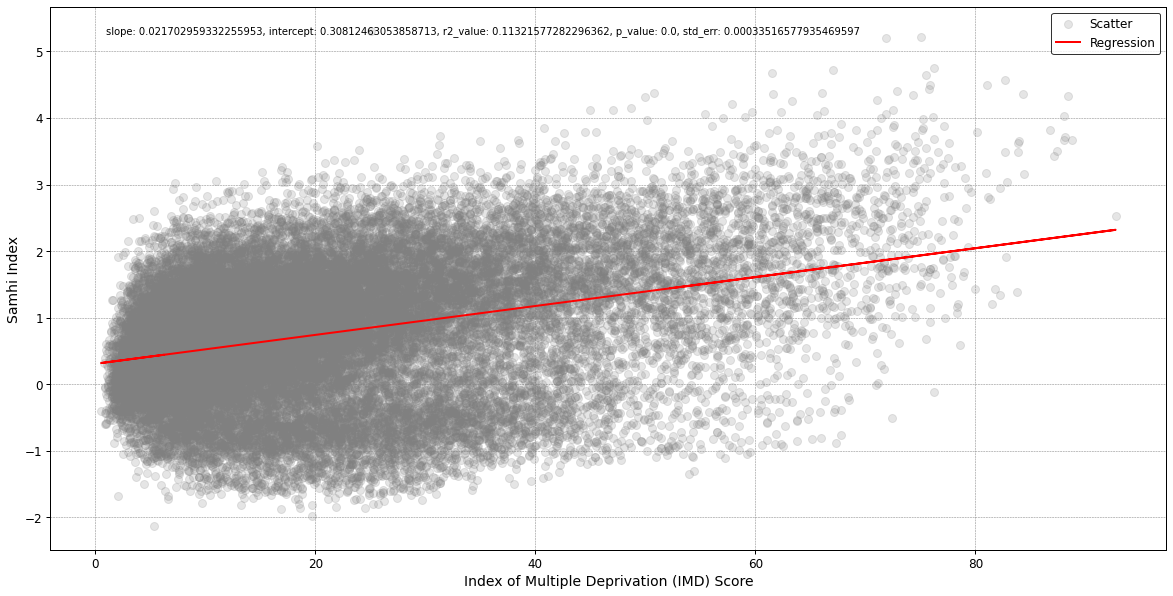

In [56]:
from matplotlib import pylab
import matplotlib_inline as mpl

fig, ax = plt.subplots()
ax.scatter(deprivationArray, samhiArray, alpha=0.2, color='grey', label= 'Scatter')
ax.plot(deprivationArray, lin_fit.predict(deprivationArray.reshape(-1,1)), color='red', label= 'Regression')
ax.text(0.05, 0.95, f"slope: {slope}, intercept: {intercept}, r2_value: {r_value*r_value}, p_value: {p_value}, std_err: {std_err}",
        transform=ax.transAxes, fontsize=10)
ax.axes.set_axis_on(True)
ax.set_xlabel('Index of Multiple Deprivation (IMD) Score')
ax.set_ylabel('Samhi Index')
ax.legend(loc='upper right')
plt.show()